In [2]:
pip install ddeint

  Created wheel for ddeint: filename=ddeint-0.2-py3-none-any.whl size=3980 sha256=57ce7bc775329fb2627fe8d9714faf012f10c69eb202e9f035dfa23c45701796
  Stored in directory: c:\users\ajpar\appdata\local\pip\cache\wheels\89\81\7b\fc23277c75dee6af233c054a58d8b54c33ffb884d76c94a132
Successfully built ddeint
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ajpar\anaconda3\python.exe -m pip install --upgrade pip' command.


C:\Users\ajpar\anaconda3\lib\site-packages\ddeint\ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


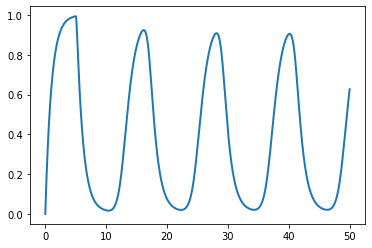

In [5]:
import numpy as np
from ddeint import ddeint
from pylab import *

 
# MODEL, WITH UNKNOWN PARAMETERS
model = lambda Y,t,k,d,r :  1/(1+(Y(t-d)/k)**2) - r*Y(t)
 
# HISTORY
g = lambda t:0
 
# SOLVING
tt = linspace(0,50,10000)
yy = ddeint(model,g,tt,fargs=( 0.1 , 5 , 1 )) # K = 0.1, d = 5, r = 1
 
# PLOTTING
fig,ax=subplots(1)
ax.plot(tt,yy,lw=2)
show()

C:\Users\ajpar\anaconda3\lib\site-packages\ddeint\ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


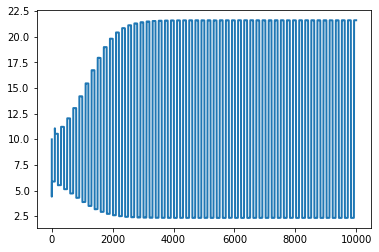

In [15]:
import numpy as np
from ddeint import ddeint
from pylab import *

 
theta = 10      # mid-range pupil size
Lambda_max = 30 # maximum pupil size
Lambda_min = 0  # minimum pupil size
n = 10           # Hill coefficient
gamma = 5       # gamma
alpha = 3     # alpha
I = 100         # constant for lumens
phi_th = 1     # threshold value for illuminance
d = 100         # time delay
start = 10      # value for A on the interval (-d,0)

# g(A) = theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n)
#dg/dA = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)

model = lambda A,t :  (1/(-((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)))*((gamma*np.log((I*A(t-d))/phi_th))-alpha*theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n))
g = lambda t:start

print()

tt = linspace(0,10000,100000)
yy = ddeint(model,g,tt)
 

plot(tt,yy,lw=2)
A_eq = yy[9999]
dA_eq = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A_eq)/(A_eq-Lambda_min),(1-n)/n)*pow((A_eq-Lambda_min),-2)

C:\Users\ajpar\anaconda3\lib\site-packages\ddeint\ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


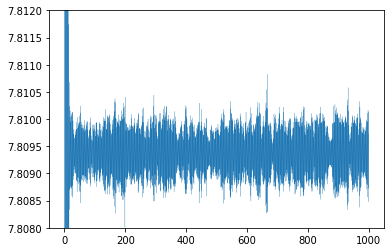

In [43]:
import numpy as np
from ddeint import ddeint
from pylab import *

 
theta = 10      # mid-range pupil size
Lambda_max = 30 # maximum pupil size
Lambda_min = 0  # minimum pupil size
n = 10           # Hill coefficient
gamma = 5       # gamma
alpha = 3     # alpha
I = 100         # constant for lumens
phi_th = 1     # threshold value for illuminance
d = .5      # time delay
start = 10      # value for A on the interval (-d,0)

# g(A) = theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n)
#dg/dA = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)

model = lambda A,t :  (1/(-((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)))*((gamma*np.log((I*A(t-d))/phi_th))-alpha*theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n))
g = lambda t:start

print()

tt = linspace(0,1000,10000)
yy = ddeint(model,g,tt)
 

plot(tt,yy,lw=.2)
ylim(7.808,7.812)

A_eq = yy[9999]
dA_eq = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A_eq)/(A_eq-Lambda_min),(1-n)/n)*pow((A_eq-Lambda_min),-2)

C:\Users\ajpar\anaconda3\lib\site-packages\ddeint\ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


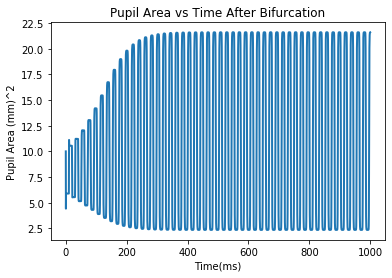

In [50]:
import numpy as np
from ddeint import ddeint
from pylab import *

 
theta = 10      # mid-range pupil size
Lambda_max = 30 # maximum pupil size
Lambda_min = 0  # minimum pupil size
n = 10           # Hill coefficient
gamma = 5       # gamma
alpha = 3     # alpha
I = 100         # constant for lumens
phi_th = 1     # threshold value for illuminance
d = 10       # time delay
start = 10      # value for A on the interval (-d,0)

# g(A) = theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n)
#dg/dA = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)

model = lambda A,t :  (1/(-((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)))*((gamma*np.log((I*A(t-d))/phi_th))-alpha*theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n))
g = lambda t:start

print()

tt = linspace(0,1000,10000)
yy = ddeint(model,g,tt)
 

plot(tt,yy,lw=2)
xlabel("Time(ms)")
ylabel("Pupil Area (mm)^2")
title("Pupil Area vs Time After Bifurcation")
A_eq = yy[9999]
dA_eq = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A_eq)/(A_eq-Lambda_min),(1-n)/n)*pow((A_eq-Lambda_min),-2)

C:\Users\ajpar\anaconda3\lib\site-packages\ddeint\ddeint.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([g(tt[0])] + results)


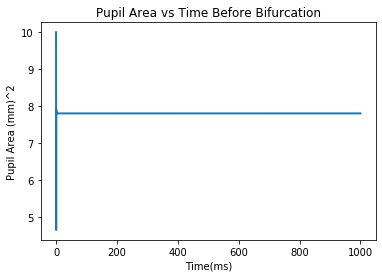

In [49]:
import numpy as np
from ddeint import ddeint
from pylab import *

 
theta = 10      # mid-range pupil size
Lambda_max = 30 # maximum pupil size
Lambda_min = 0  # minimum pupil size
n = 10           # Hill coefficient
gamma = 5       # gamma
alpha = 3     # alpha
I = 100         # constant for lumens
phi_th = 1     # threshold value for illuminance
d = .10       # time delay
start = 10      # value for A on the interval (-d,0)

# g(A) = theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n)
#dg/dA = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)

model = lambda A,t :  (1/(-((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),(1-n)/n)*pow((A(t)-Lambda_min),-2)))*((gamma*np.log((I*A(t-d))/phi_th))-alpha*theta*pow((Lambda_max+Lambda_min-A(t))/(A(t)-Lambda_min),1/n))
g = lambda t:start

print()

tt = linspace(0,1000,10000)
yy = ddeint(model,g,tt)
 

plot(tt,yy,lw=2)
xlabel("Time(ms)")
ylabel("Pupil Area (mm)^2")
title("Pupil Area vs Time Before Bifurcation")
A_eq = yy[9999]
dA_eq = -((theta*Lambda_max)/n)*pow((Lambda_max+Lambda_min-A_eq)/(A_eq-Lambda_min),(1-n)/n)*pow((A_eq-Lambda_min),-2)